### Data Processing and Result Discovery

Now, this part is really where we start to code and do data analysis. In order to keep track our process, we divide it into the following x parts:

- Part 1: Preparation
- Part 2: Data Preprocessing
- Part 3: Exploratory Data Analysis
- Part 4: Predictive Data Anlysis
- Part 5: Results and Conclusions

We will demonstrate each part detailedly in the below sections.

<font color = red>__Part 1: Preparation__

Our codes will cover the following in this part:
- Inputting all needed packages and functions
- Setting the seed
- Loading data that we will be using

In [123]:
library(tidyverse)
library(tidymodels)
library(repr)
library(readxl)
library(cowplot)

In [124]:
set.seed(2535) 

In [125]:
url <- "https://drive.google.com/uc?export=download&id=11KyK-H_2aP1I4FYR1aAC0wE4JB9BbAqz"
download.file(url, "raisin.xlsx")
raisin <- read_excel("raisin.xlsx")
head(raisin)

Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
87524,442.2460,253.2912,0.8197384,90546,0.7586506,1184.040,Kecimen
75166,406.6907,243.0324,0.8018052,78789,0.6841296,1121.786,Kecimen
90856,442.2670,266.3283,0.7983536,93717,0.6376128,1208.575,Kecimen
45928,286.5406,208.7600,0.6849892,47336,0.6995994,844.162,Kecimen
79408,352.1908,290.8275,0.5640113,81463,0.7927719,1073.251,Kecimen
49242,318.1254,200.1221,0.7773513,51368,0.6584564,881.836,Kecimen


<font color = red>__Part 2: Data Preprocessing__

Our codes will cover the following in this part:
- Cleaning and wrangling the data
- Creating the train / test split 
- Demonstrating why we will use MajorAxisLength as our fixed variable and why we will discard one of our combinations (MajorAxisLength with Extent) even before our Part 4:

In [126]:
# This is where we clean and wrangle our data
# There is really not too much to do since this dataset is already very tidy
raisin <- raisin |>
    mutate(Class = as_factor(Class)) |>
    filter(!is.na(Area),
           !is.na(MajorAxisLength),
           !is.na(MinorAxisLength),
           !is.na(Eccentricity),
           !is.na(ConvexArea),
           !is.na(Extent),
           !is.na(Perimeter))
head(raisin)

Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
87524,442.2460,253.2912,0.8197384,90546,0.7586506,1184.040,Kecimen
75166,406.6907,243.0324,0.8018052,78789,0.6841296,1121.786,Kecimen
90856,442.2670,266.3283,0.7983536,93717,0.6376128,1208.575,Kecimen
45928,286.5406,208.7600,0.6849892,47336,0.6995994,844.162,Kecimen
79408,352.1908,290.8275,0.5640113,81463,0.7927719,1073.251,Kecimen
49242,318.1254,200.1221,0.7773513,51368,0.6584564,881.836,Kecimen


In [127]:
# Here we are going to separate our data into training set and test test
raisin_split <- initial_split(raisin, prop = 0.7, strata = Class)
raisin_train <- training(raisin_split)
raisin_test <- testing(raisin_split)

In [128]:
decide_recipe <- recipe(Class ~ ., data = raisin_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) |>
    prep()

decide_data <- bake(decide_recipe, raisin_train)
head(decide_data)

Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.3058565,1.9159088,0.3924262,1.417334846,1.2825230,0.5977362,1.5657658,Besni
0.7909821,0.9079717,0.6949209,0.669403207,0.8150746,0.5682589,0.9884439,Besni
0.2498630,0.1572109,0.4925829,0.005492329,0.2394630,0.1275983,0.2044756,Besni
-0.6560285,-0.2156557,-0.8709853,0.827959068,-0.5654958,-1.9227672,-0.2822601,Besni
1.7349142,1.3643469,1.6646284,0.402433114,1.6680215,0.4092748,1.3468693,Besni
1.2213790,1.4930019,0.6914924,1.079157235,1.1717606,0.8004837,1.2272835,Besni


##### Graph 1 (below): Boxplots for different variables vs types of raisin 

Warning message:
“Removed 3 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”


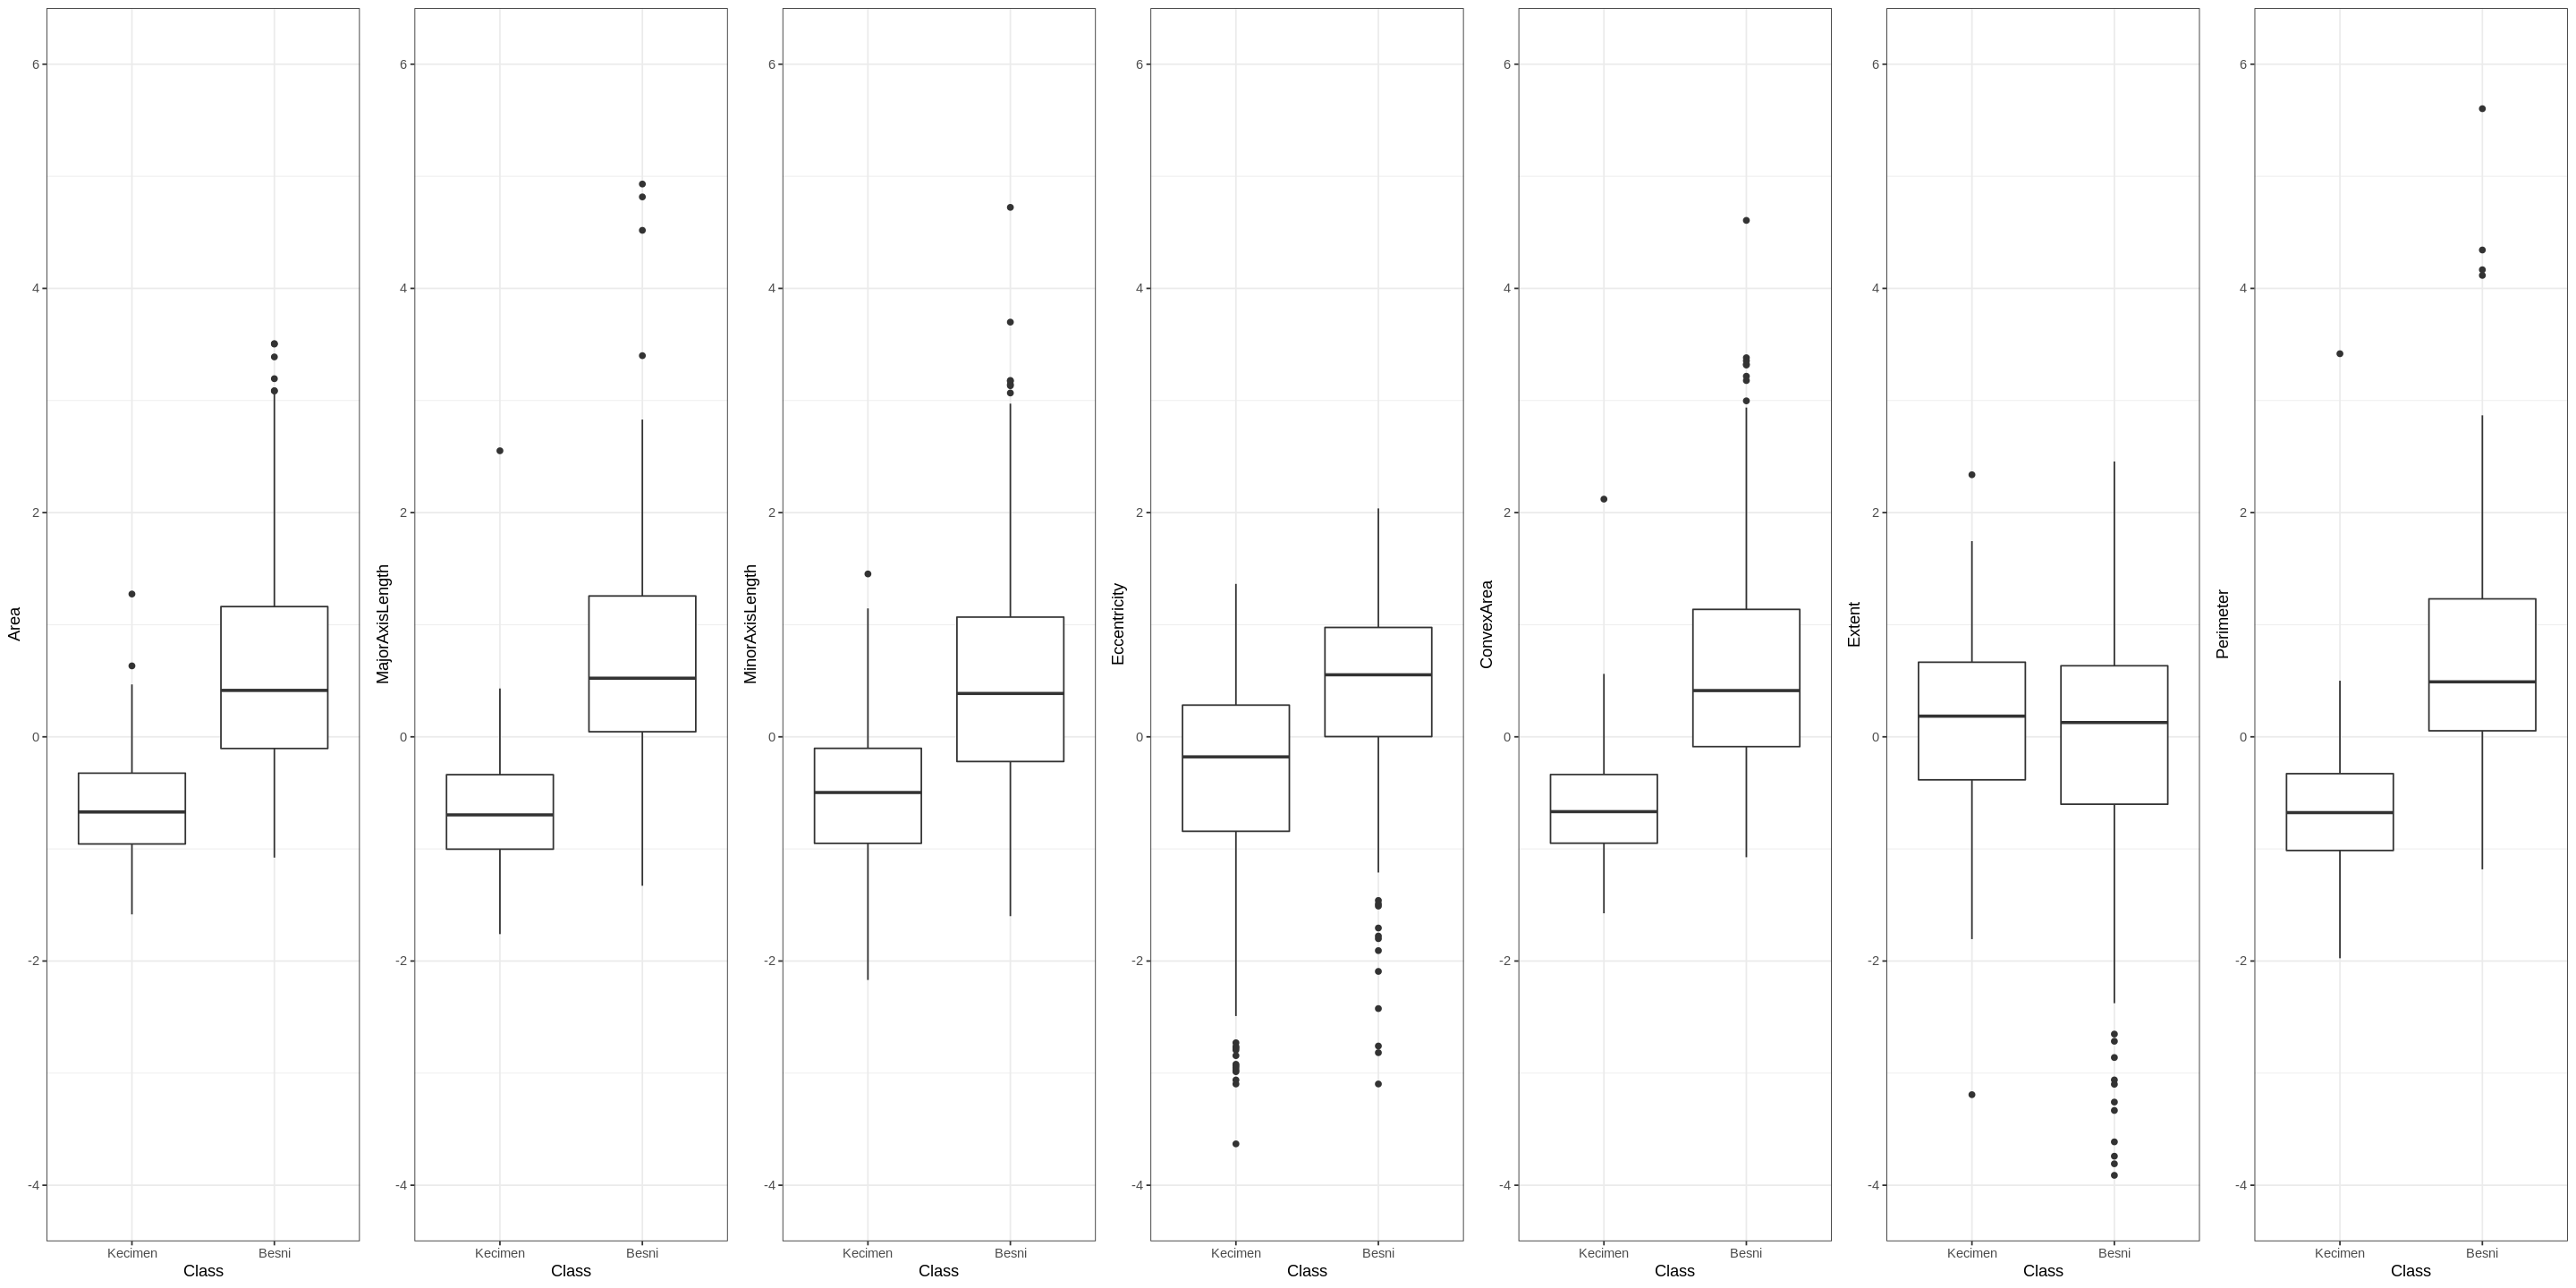

In [129]:
options(repr.plot.width = 24, repr.plot.height = 12)
graph_Ar <- ggplot(data = decide_data, mapping = aes(x = Class, y = Area)) + geom_boxplot() + theme_bw() + ylim(c(-4, 6))
graph_Mal <- ggplot(data = decide_data, mapping = aes(x = Class, y = MajorAxisLength)) + geom_boxplot() + theme_bw() + ylim(c(-4, 6))
graph_Mil <- ggplot(data = decide_data, mapping = aes(x = Class, y = MinorAxisLength)) + geom_boxplot() + theme_bw() + ylim(c(-4, 6))
graph_Ecc <- ggplot(data = decide_data, mapping = aes(x = Class, y = Eccentricity)) + geom_boxplot() + theme_bw() + ylim(c(-4, 6))
graph_Convex <- ggplot(data = decide_data, mapping = aes(x = Class, y = ConvexArea)) + geom_boxplot() + theme_bw() + ylim(c(-4, 6))
graph_Ex <- ggplot(data = decide_data, mapping = aes(x = Class, y = Extent)) + geom_boxplot() + theme_bw() + ylim(c(-4, 6))
graph_Per <- ggplot(data = decide_data, mapping = aes(x = Class, y = Perimeter)) + geom_boxplot() + theme_bw() + ylim(c(-4, 6))
compare_graph <- plot_grid(graph_Ar,
                           graph_Mal,
                           graph_Mil,
                           graph_Ecc,
                           graph_Convex,
                           graph_Ex,
                           graph_Per,
                           ncol = 7)
compare_graph

Let's fix MajorAxisLength and discard Extent, think from this viewpoints:
intervals: More different intervals (cover more different place), easy to distinguish between two types of raisins

<font color = red>__Part 3: Exploratory Data Analysis__

Our codes will cover the following in this part:
- Data summary for exploratory analysis
- Data visualization for exploratory analysis

In [130]:
table_1 <- raisin_train |>
    summarize(rows = n())
table_1    

rows
<int>
630


<font color = red>**Part 4: Predictive Data Analysis**

__*** We will be using k-nn Classification method here ***__

Our codes will cover the following in this part:
- Finding prediction accuracy we got from all 5 different combinations
- How different models we got from each combination look like when they are applied on the testing data (visualization)

In [140]:
# The following objects are those that can be used through all 5 combinations:
raisin_vfold <- vfold_cv(raisin_train, v = 5, strata = Class)                  # cross-validation
gridvals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))                # setting range for k that we will be using to tune our model

<font color = blue>*Combination 1: MajorAxisLength & Area*

In [141]:
area_recipe <- recipe(Class ~ Area, data = raisin_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

area_spec <- nearest_neighbor(weight_func = "rectangular",
                              neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

area_accuracies <- workflow() |>
    add_recipe(area_recipe) |>
    add_model(area_spec) |>
    tune_grid(resamples = raisin_vfold,
              grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")
head(area_accuracies)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7380952,5,0.01792316,Preprocessor1_Model01
6,accuracy,binary,0.7746032,5,0.01854495,Preprocessor1_Model02
11,accuracy,binary,0.8079365,5,0.01337484,Preprocessor1_Model03
16,accuracy,binary,0.8142857,5,0.01111111,Preprocessor1_Model04
21,accuracy,binary,0.8111111,5,0.01187828,Preprocessor1_Model05
26,accuracy,binary,0.8174603,5,0.01328032,Preprocessor1_Model06


In [144]:
k_suitable <- area_accuracies |>
    arrange(desc(mean)) |>
    slice(1) |>
    pull(neighbors)
k_suitable

[1] 26

In [149]:
area_spec2 <- nearest_neighbor(weight_func = "rectangular",
                               neighbors = k_suitable) |>
    set_engine("kknn") |>
    set_mode("classification")

area_fit <- workflow() |>
    add_recipe(area_recipe) |>
    add_model(area_spec2) |>
    fit(data = raisin_train)

area_test_predictions <- predict(area_fit, raisin_test) |>
    bind_cols(raisin_test) |>
    metrics(truth = Class, estimate = .pred_class) |>
    filter(.metric == "accuracy")
area_test_predictions

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8074074
